In [1]:
#https://www.youtube.com/watch?v=OnWIYI6-4Ss&feature=youtu.be
#https://github.com/llSourcell/Object_Detection_demo_LIVE/blob/master/demo.py
#%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
#from __future__ import division

In [2]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(15, 15))
    
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    
def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(rgb)
    
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')
    
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)

In [3]:
import cv2
image = cv2.imread('lip.jpg')

In [4]:
image.shape

(2617, 1990, 3)

In [5]:

import pandas as pd
m,n,r = image.shape
arr = image.reshape(m*n, -1)
df = pd.DataFrame(arr, columns=['b', 'g', 'r'])
df.describe()

b             g             r
count  5.207830e+06  5.207830e+06  5.207830e+06
mean   9.841898e+01  1.270809e+02  1.967918e+02
std    4.335444e+01  5.536783e+01  3.594168e+01
min    0.000000e+00  0.000000e+00  1.600000e+01
25%    6.100000e+01  8.900000e+01  1.710000e+02
50%    1.100000e+02  1.490000e+02  2.100000e+02
75%    1.310000e+02  1.680000e+02  2.250000e+02
max    2.540000e+02  2.520000e+02  2.550000e+02

In [6]:
# Convert from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize to a third of the size
image = cv2.resize(image, None, fx=1/3, fy=1/3)

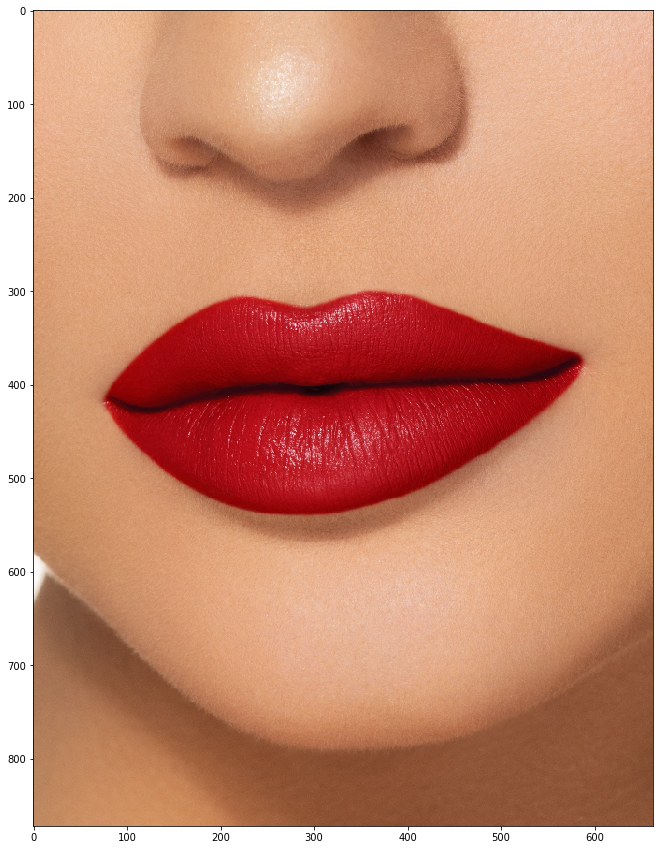

In [7]:
show(image)

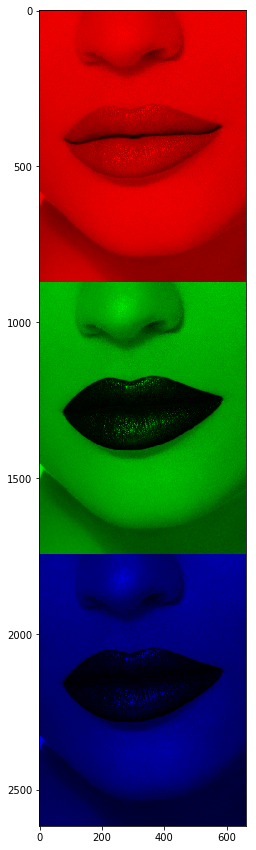

In [8]:
# Show Red/Green/Blue
images = []
for i in [0, 1, 2]:
    colour = image.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 0
    if i != 2: colour[:,:,2] = 0
    images.append(colour)
    
show(np.vstack(images))

TypeError: only size-1 arrays can be converted to Python scalars

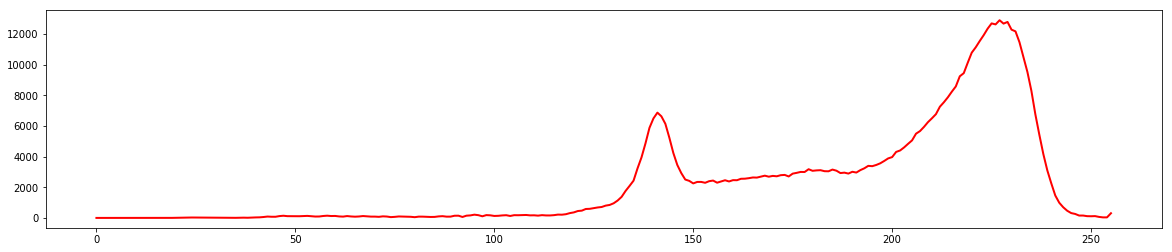

In [9]:

def show_rgb_hist(image):
    colours = ('r','g','b')
    for i, c in enumerate(colours):
        plt.figure(figsize=(20, 4))
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histr, color=c, lw=2)
        
        if c == 'r': colours = [((i/256, 0, 0)) for i in range(0, 256)]
        if c == 'g': colours = [((0, i/256, 0)) for i in range(0, 256)]
        if c == 'b': colours = [((0, 0, i/256)) for i in range(0, 256)]
        
        plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
        plt.xlim([0, 256])

        plt.show()
    
show_rgb_hist(image)

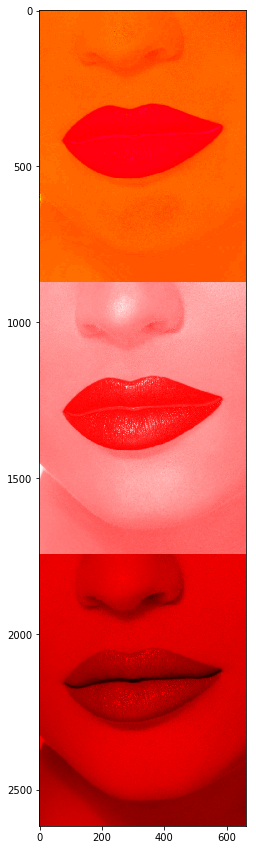

In [10]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

images = []
for i in [0, 1, 2]:
    colour = hsv.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 255
    if i != 2: colour[:,:,2] = 255
    images.append(colour)
    
hsv_stack = np.vstack(images)
rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
show(rgb_stack)

TypeError: only size-1 arrays can be converted to Python scalars

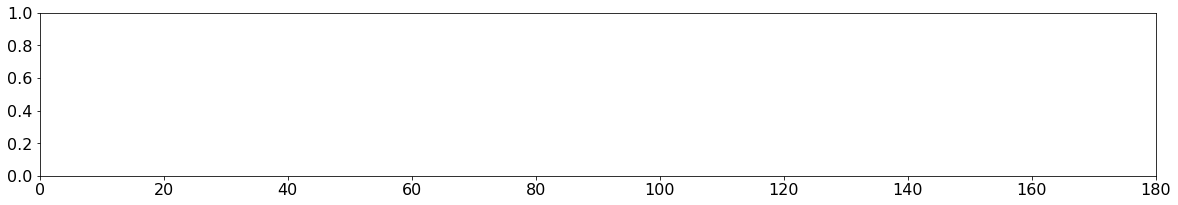

In [11]:
matplotlib.rcParams.update({'font.size': 16})

def show_hsv_hist(image):
    # Hue
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [0], None, [180], [0, 180])
    plt.xlim([0, 180])
    colours = [colors.hsv_to_rgb((i/180, 1, 0.9)) for i in range(0, 180)]
    plt.bar(range(0, 180), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Hue')

    # Saturation
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [1], None, [256], [0, 256])
    plt.xlim([0, 256])

    colours = [colors.hsv_to_rgb((0, i/256, 1)) for i in range(0, 256)]
    plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Saturation')

    # Value
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [2], None, [256], [0, 256])
    plt.xlim([0, 256])

    colours = [colors.hsv_to_rgb((0, 1, i/256)) for i in range(0, 256)]
    plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Value')
    
show_hsv_hist(hsv)

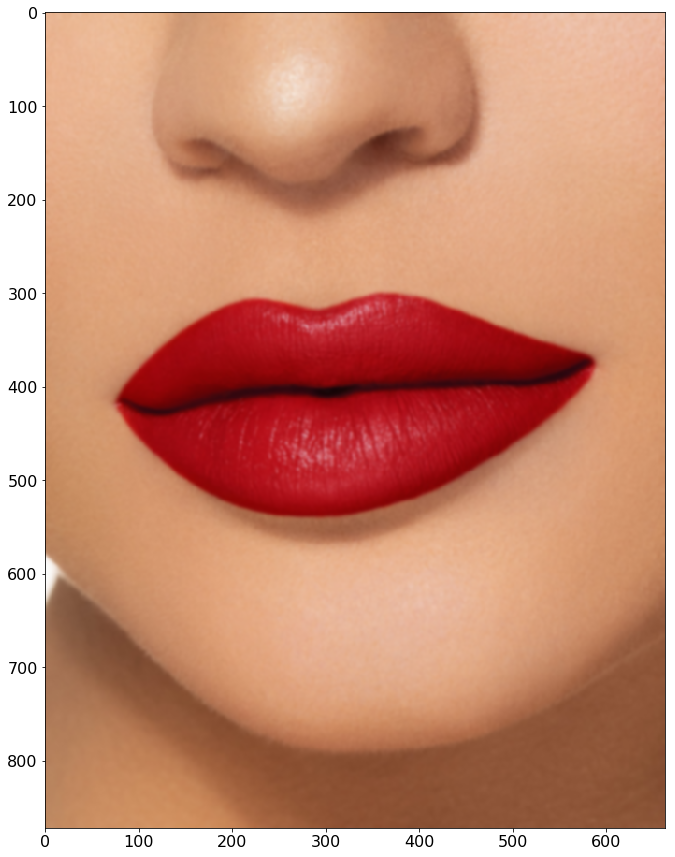

In [12]:
# Blur image slightly
image_blur = cv2.GaussianBlur(image, (7, 7), 0)
show(image_blur)

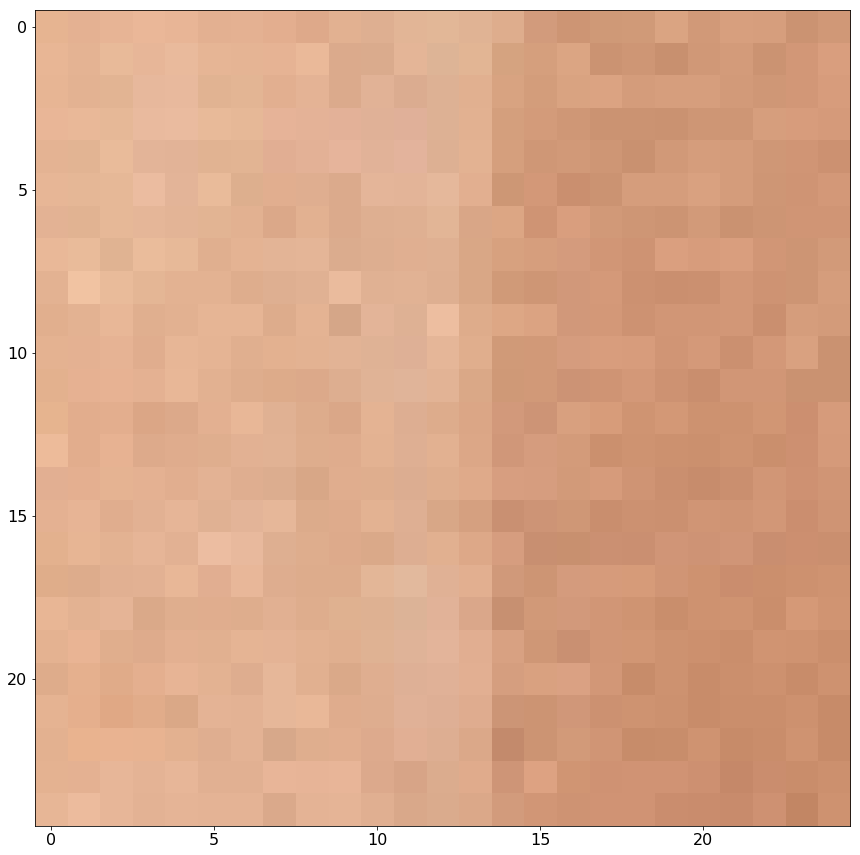

In [13]:

image_cropped = image[100:125, 100:125]
show(image_cropped)
# image_rect_hsv = cv2.cvtColor(image_rect, cv2.COLOR_RGB2HSV)
# show_hsv_hist(image_rect_hsv)

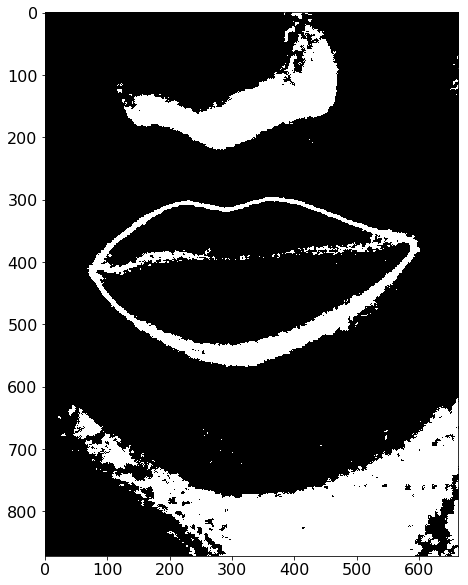

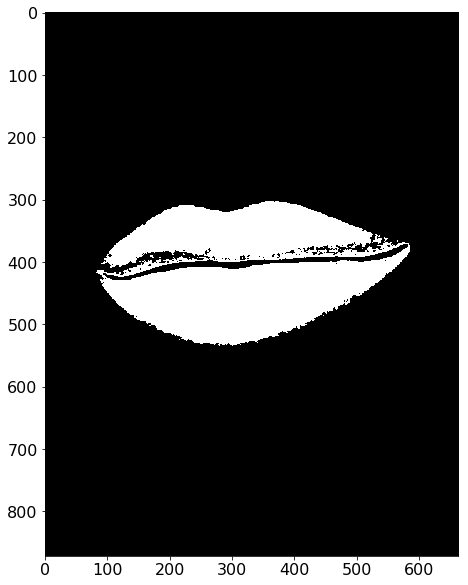

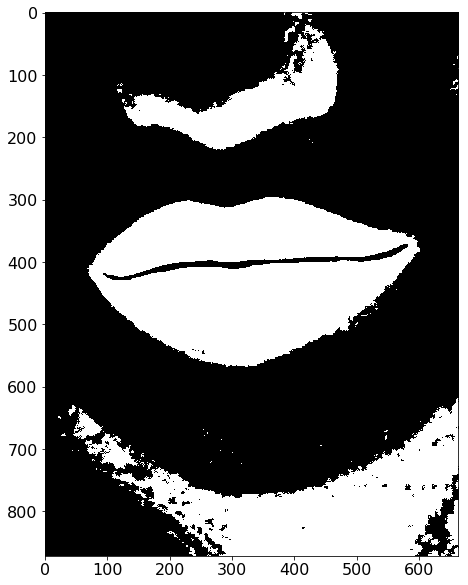

In [14]:
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

# 0-10 hue
min_red = np.array([0, 100, 80])
max_red = np.array([10, 256, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

# 170-180 hue
min_red2 = np.array([170, 100, 80])
max_red2 = np.array([180, 256, 256])
image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

show_mask(image_red1)
show_mask(image_red2)
image_red = image_red1 + image_red2
show_mask(image_red)

In [15]:
image_red

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

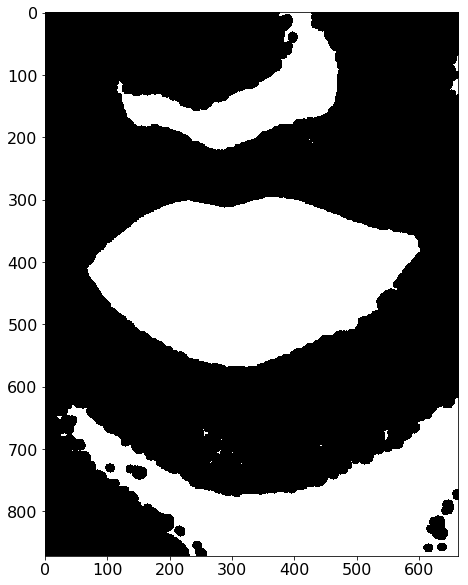

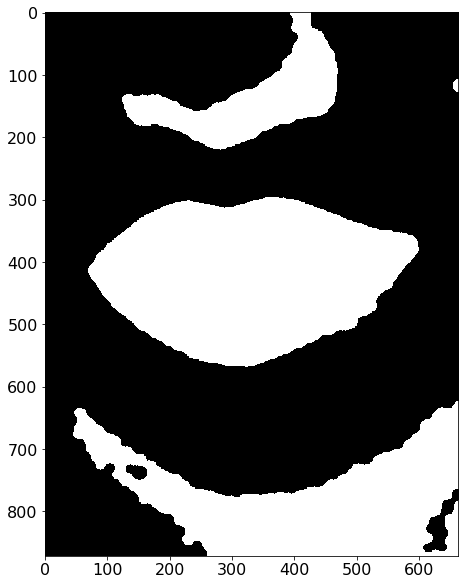

In [16]:
# Clean up
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

# image_red_eroded = cv2.morphologyEx(image_red, cv2.MORPH_ERODE, kernel)
# show_mask(image_red_eroded)

# image_red_dilated = cv2.morphologyEx(image_red, cv2.MORPH_DILATE, kernel)
# show_mask(image_red_dilated)

# image_red_opened = cv2.morphologyEx(image_red, cv2.MORPH_OPEN, kernel)
# show_mask(image_red_opened)

# Fill small gaps
image_red_closed = cv2.morphologyEx(image_red, cv2.MORPH_CLOSE, kernel)
show_mask(image_red_closed)

# Remove specks
image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)
show_mask(image_red_closed_then_opened)

5


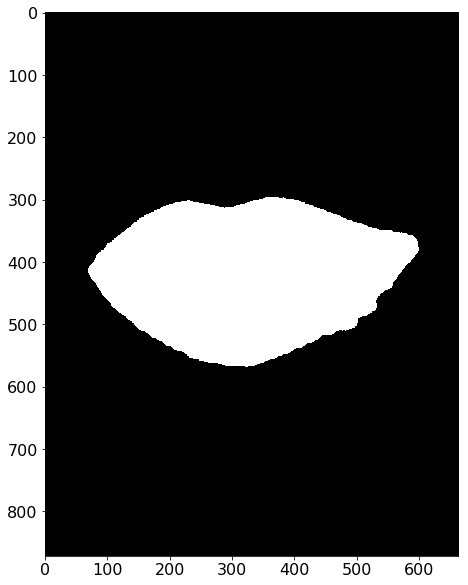

In [17]:
def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print (len(contours))

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

big_contour, red_mask = find_biggest_contour(image_red_closed_then_opened)
show_mask(red_mask)


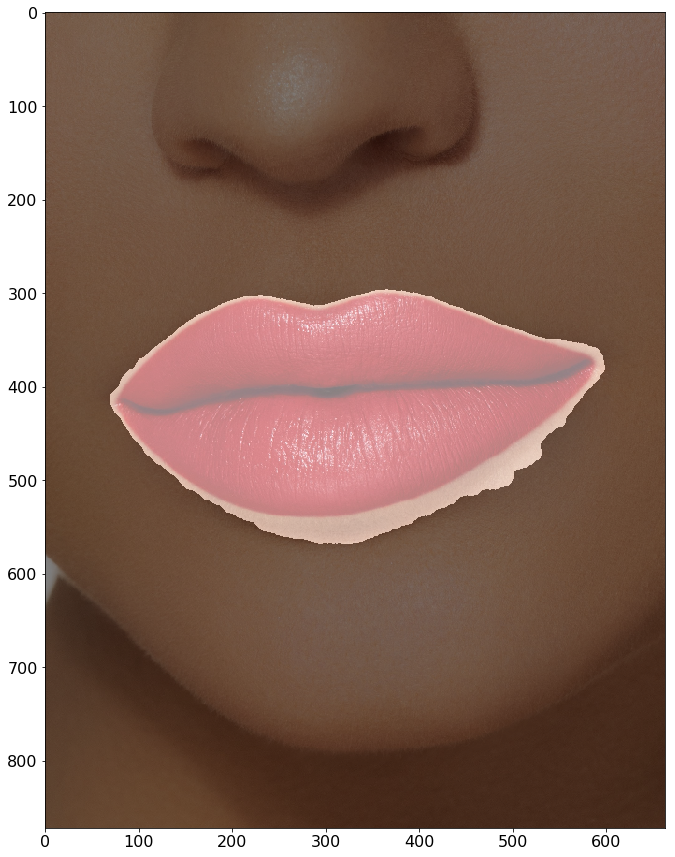

In [18]:
overlay_mask(red_mask, image)

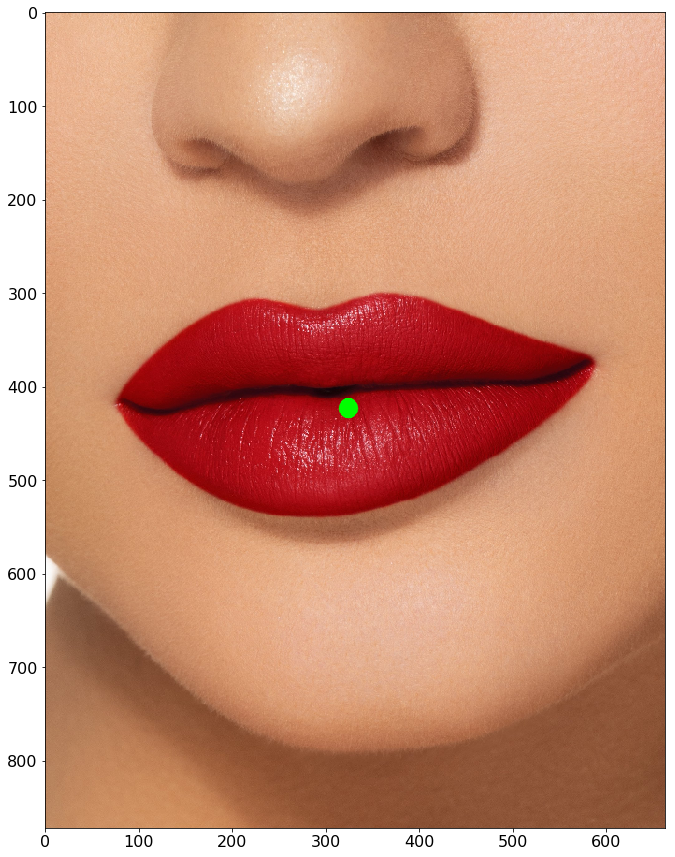

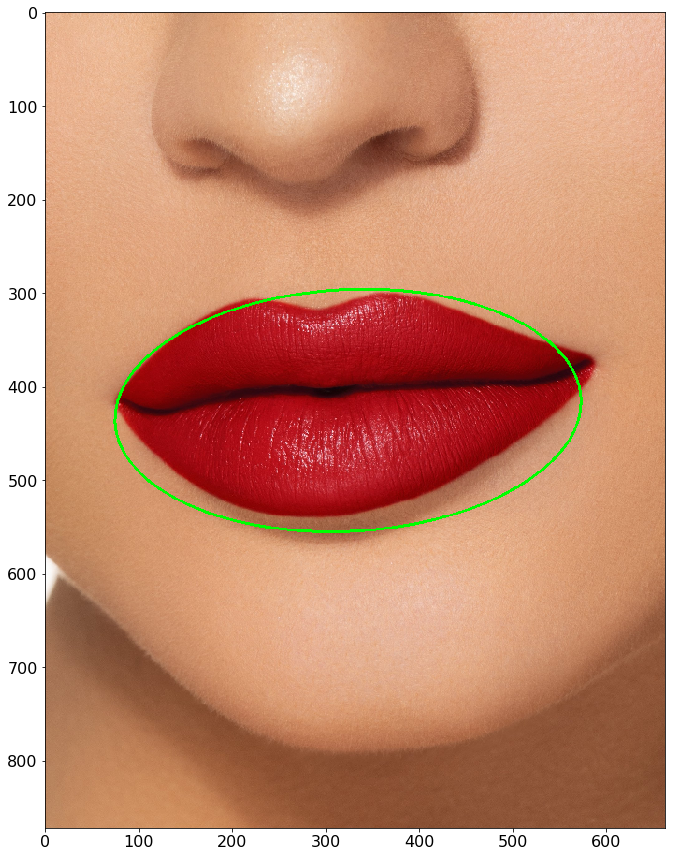

In [19]:
# Centre of mass
moments = cv2.moments(red_mask)
centre_of_mass = int(moments['m10'] / moments['m00']), int(moments['m01'] / moments['m00'])
image_with_com = image.copy()
cv2.circle(image_with_com, centre_of_mass, 10, (0, 255, 0), -1, cv2.LINE_AA)
show(image_with_com)

# Bounding ellipse
image_with_ellipse = image.copy()
ellipse = cv2.fitEllipse(big_contour)
cv2.ellipse(image_with_ellipse, ellipse, (0,255,0), 2)
show(image_with_ellipse)

In [20]:
#from __future__ import division
import cv2
#to show the image
from matplotlib import pyplot as plt
import numpy as np
from math import cos, sin

green = (0, 255, 0)

def show(image):
    # Figure size in inches
    plt.figure(figsize=(10, 10))

    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')

def overlay_mask(mask, image):
	#make the mask rgb
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    #calculates the weightes sum of two arrays. in our case image arrays
    #input, how much to weight each. 
    #optional depth value set to 0 no need
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    return img

def find_biggest_contour(image):
    # Copy
    image = image.copy()
    #input, gives all the contours, contour approximation compresses horizontal, 
    #vertical, and diagonal segments and leaves only their end points. For example, 
    #an up-right rectangular contour is encoded with 4 points.
    #Optional output vector, containing information about the image topology. 
    #It has as many elements as the number of contours.
    #we dont need it
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]

    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

def circle_contour(image, contour):
    # Bounding ellipse
    image_with_ellipse = image.copy()
    #easy function
    ellipse = cv2.fitEllipse(contour)
    #add it
    cv2.ellipse(image_with_ellipse, ellipse, green, 2, cv2.LINE_AA)
    return image_with_ellipse

def find_strawberry(image):
    #RGB stands for Red Green Blue. Most often, an RGB color is stored 
    #in a structure or unsigned integer with Blue occupying the least 
    #significant “area” (a byte in 32-bit and 24-bit formats), Green the 
    #second least, and Red the third least. BGR is the same, except the 
    #order of areas is reversed. Red occupies the least significant area,
    # Green the second (still), and Blue the third.
    # we'll be manipulating pixels directly
    #most compatible for the transofrmations we're about to do
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Make a consistent size
    #get largest dimension
    max_dimension = max(image.shape)
    #The maximum window size is 700 by 660 pixels. make it fit in that
    scale = 700/max_dimension
    #resize it. same width and hieght none since output is 'image'.
    image = cv2.resize(image, None, fx=scale, fy=scale)
    
    #we want to eliminate noise from our image. clean. smooth colors without
    #dots
    # Blurs an image using a Gaussian filter. input, kernel size, how much to filter, empty)
    image_blur = cv2.GaussianBlur(image, (7, 7), 0)
    #t unlike RGB, HSV separates luma, or the image intensity, from
    # chroma or the color information.
    #just want to focus on color, segmentation
    image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

    # Filter by colour
    # 0-10 hue
    #minimum red amount, max red amount
    min_red = np.array([0, 100, 80])
    max_red = np.array([10, 256, 256])
    #layer
    mask1 = cv2.inRange(image_blur_hsv, min_red, max_red)

    #birghtness of a color is hue
    # 170-180 hue
    min_red2 = np.array([170, 100, 80])
    max_red2 = np.array([180, 256, 256])
    mask2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

    #looking for what is in both ranges
    # Combine masks
    mask = mask1 + mask2

    # Clean up
    #we want to circle our strawberry so we'll circle it with an ellipse
    #with a shape of 15x15
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    #morph the image. closing operation Dilation followed by Erosion. 
    #It is useful in closing small holes inside the foreground objects, 
    #or small black points on the object.
    mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    #erosion followed by dilation. It is useful in removing noise
    mask_clean = cv2.morphologyEx(mask_closed, cv2.MORPH_OPEN, kernel)

    # Find biggest strawberry
    #get back list of segmented strawberries and an outline for the biggest one
    big_strawberry_contour, mask_strawberries = find_biggest_contour(mask_clean)

    # Overlay cleaned mask on image
    # overlay mask on image, strawberry now segmented
    overlay = overlay_mask(mask_clean, image)

    # Circle biggest strawberry
    #circle the biggest one
    circled = circle_contour(overlay, big_strawberry_contour)
    show(circled)
    
    #we're done, convert back to original color scheme
    bgr = cv2.cvtColor(circled, cv2.COLOR_RGB2BGR)
    
    return bgr

#read the image
image = cv2.imread('lip1.jpg')
#detect it
result = find_strawberry(image)
#write the new image
cv2.imwrite('lip1-1.jpg', result)

error: OpenCV(4.0.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
